<a href="https://colab.research.google.com/github/Shreya-7558/Machin-Learning-project-Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Ankur Kumar
##### **Team Member 2 -** Amanjeet kumar singh
##### **Team Member 3 -** Shreya Kurode


# **Project Summary -**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **GitHub Link -**

https://github.com/ankurkumar0907/Health-Insurance-Cross-Sell-Prediction/blob/d5265a2296fe67c1fabe556eedea2664eab97ff2/Health_Insurance_Cross_Sell_Prediction.ipynb

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
df.shape

(56842, 12)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<Axes: >

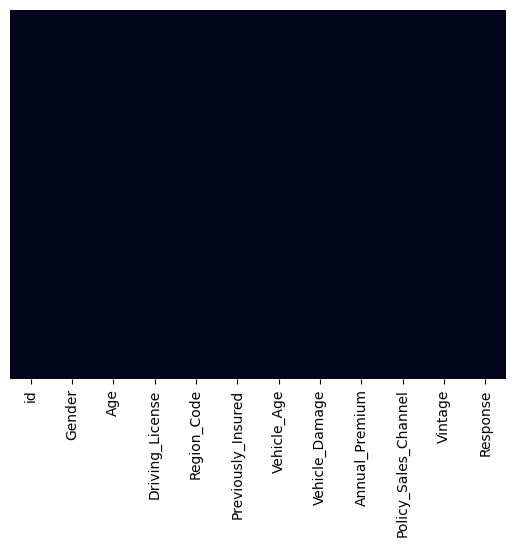

In [7]:
# Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### What did you know about your dataset?

## Missing Values/Null Values Count:

There are no missing values or null values in any of the columns in your dataset. This is indicated by the output you provided, which shows that all columns have a count of 381109 non-null values.

##Shape:

Your dataset has a shape of (381109, 12), which means it consists of 381109 rows and 12 columns.

##Data Types:

You've also displayed the data types of each column. Here's a summary of the data types:
Columns with int64 data type: id, Age, Driving_License, Previously_Insured, Annual_Premium, Policy_Sales_Channel, Vintage, and Response.

Columns with float64 data type: Region_Code.
Columns with object data type: Gender, Vehicle_Age, and Vehicle_Damage.

##Duplicate Values:

You've checked for duplicate rows and found that there are no duplicated rows in your dataset.

**Overall, your dataset appears to be clean, with no missing values or duplicated rows. It consists of a mix of numerical and categorical features, which suggests that it may be suitable for various types of analysis or modeling tasks. Depending on your goals, you can now proceed with data exploration, analysis.**

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


### Variables Description

* id: An identifier for each data point, ranging from 1 to 381109.

* Age: Age of individuals, ranging from 20 to 85, with a mean of approximately 38.82.

* Driving_License: A binary variable with values 0 or 1, indicating whether individuals have a driving license. The majority of individuals have a driving license (mean ≈ 0.998).

* Region_Code: A numerical code for regions, ranging from 0 to 52, with a mean of approximately 26.39.

* Previously_Insured: A binary variable with values 0 or 1, indicating whether individuals were previously insured. About 45.82% of individuals were previously insured.

* Annual_Premium: The annual premium amount, which varies from 2630 to 540165, with a mean of approximately 30564.39.

* Policy_Sales_Channel: A numerical code for the policy sales channel, ranging from 1 to 163, with a mean of approximately 112.03.

* Vintage: The number of days an individual has been associated with the company, ranging from 10 to 299 days, with a mean of approximately 154.35.

* Response: A binary variable with values 0 or 1, indicating whether individuals responded positively (1) or negatively (0). About 12.26% of individuals responded positively.

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
column_name = list(df.columns)
for i in column_name:
    print(i,":",df[i].nunique())

id : 56842
Gender : 2
Age : 66
Driving_License : 2
Region_Code : 53
Previously_Insured : 2
Vehicle_Age : 3
Vehicle_Damage : 2
Annual_Premium : 25848
Policy_Sales_Channel : 127
Vintage : 290
Response : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Write your code to make your dataset analysis ready.
#df.drop_duplicates(inplace=True)
#df.dropna(inplace=True)


### What all manipulations have you done and insights you found?

Removal of duplicate rows, as duplicate data can skew analysis results Handling missing values.  

* your dataset does not contain any duplicate values or missing values, as you mentioned earlier. In that case, you have a clean dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

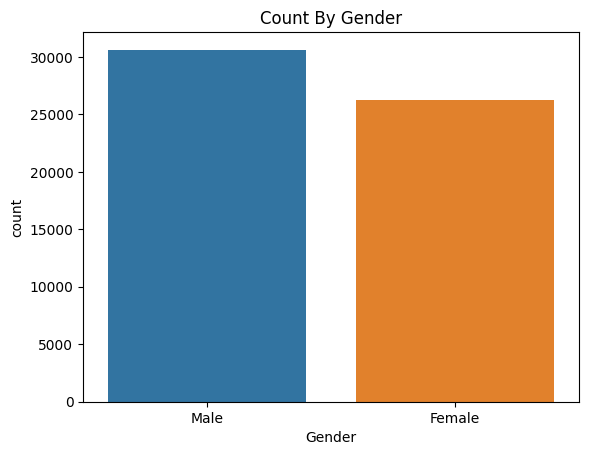

In [11]:
# Chart - 1 visualization code
sns.countplot(data = df,x = 'Gender')
plt.title("Count By Gender")
plt.show()

##### 1. Why did you pick the specific chart?

This choice of chart is suitable for visualizing the count or frequency of categorical data, such as gender, where you want to see how many data points fall into each category.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the count of individuals in your dataset by gender, with two bars representing the two gender categories (e.g., 'Male' and 'Female').
From the chart, you can see the relative proportions of individuals in each gender category.
You can easily compare the counts of 'Male' and 'Female' individuals in the dataset.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it's important to note that this chart alone may provide limited insights. To create a positive business impact, you would typically combine insights from various charts and analyses, including demographic information like gender, with other relevant data and conduct more in-depth analysis to address specific business questions and objectives.

#### Chart - 2

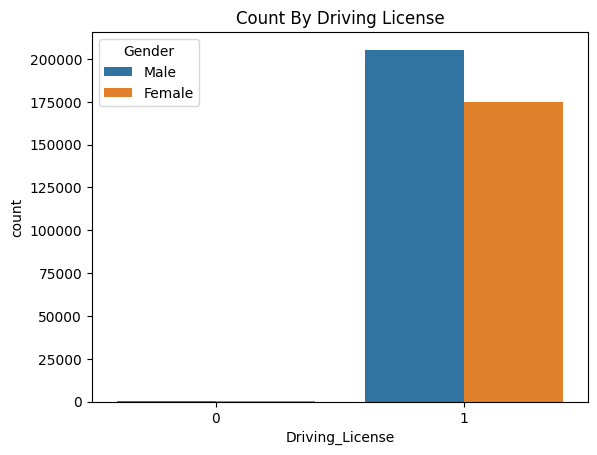

In [ ]:
# Chart - 2 visualization code
sns.countplot(data = df,x = 'Driving_License',hue = 'Gender')
plt.title("Count By Driving License")
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar charts are a good choice when you want to visualize how a categorical variable (in this case, 'Driving_License') is distributed across different categories (e.g., 'Male' and 'Female') and compare the proportions within each category.

##### 2. What is/are the insight(s) found from the chart?

* The chart displays two bars for each category of 'Driving_License' (0 and 1), one for 'Male' and one for 'Female'.

* Each bar is stacked to represent the count of individuals with or without a driving license within each gender category.

* The different colors within each bar (e.g., different shades for 'Male' and 'Female') represent the breakdown of driving license status.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If there are significant differences in the distribution of driving licenses between genders, this information can guide marketing efforts and the development of products or services tailored to each gender.

#### Chart - 3

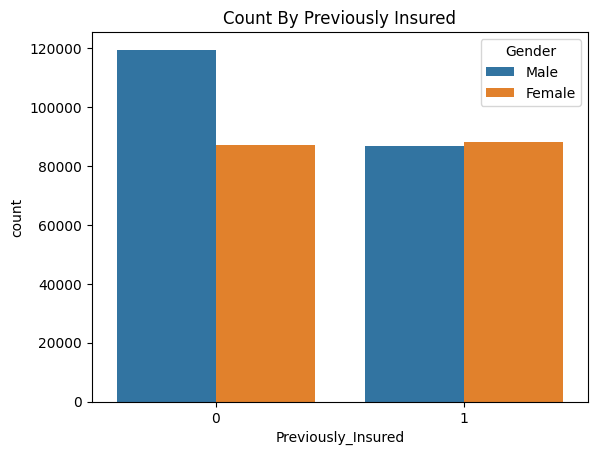

In [ ]:
# Chart - 3 visualization code
sns.countplot(data = df, x = "Previously_Insured",hue = 'Gender')
plt.title("Count By Previously Insured")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is an appropriate choice when you want to visualize the distribution of categorical data (in this case, 'Previously_Insured') and compare the distribution within each category by another categorical variable ('Gender').

##### 2. What is/are the insight(s) found from the chart?

The chart displays two bars for each category of 'Previously_Insured' (0 and 1), one for 'Male' and one for 'Female'.
Each bar is stacked to represent the count of individuals who are or are not previously insured within each gender category.
The different colors within each bar (e.g., different shades for 'Male' and 'Female') represent the breakdown of insurance status.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the distribution of previously insured individuals by gender can inform targeted marketing strategies.

* For example, you can tailor advertising or communication to appeal to specific gender groups based on their insurance status.

#### Chart - 4

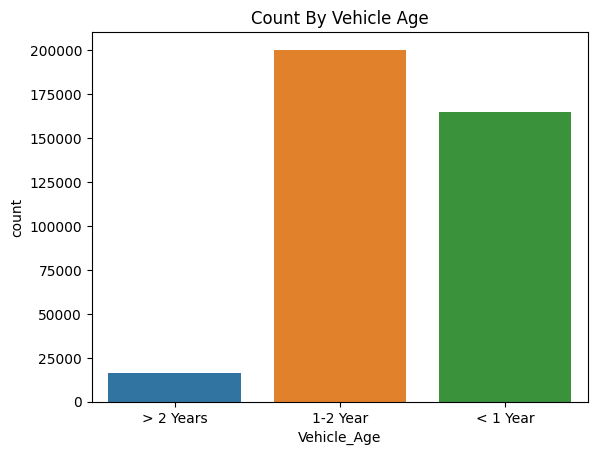

In [ ]:
# Chart - 4 visualization code
sns.countplot(data = df, x = 'Vehicle_Age')
plt.title("Count By Vehicle Age")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a good choice when you want to visualize the frequency or count of data within categorical categories (in this case, 'Vehicle_Age').

##### 2. What is/are the insight(s) found from the chart?

The chart displays bars representing the count of individuals falling into each category of vehicle age ('< 1 Year', '1-2 Year', and '> 2 Years').

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of vehicle ages can inform product customization or recommendations. For example, insurance products or services could be tailored to the specific needs or risks associated with different vehicle age groups.

#### Chart - 5

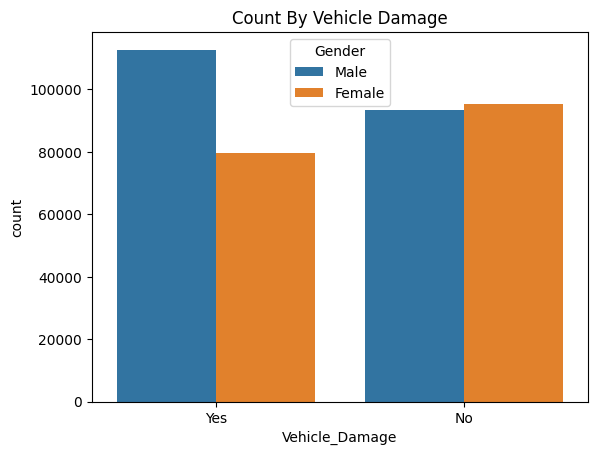

In [ ]:
# Chart - 5 visualization code
sns.countplot(data = df, x = "Vehicle_Damage", hue = "Gender")
plt.title("Count By Vehicle Damage")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is an appropriate choice when you want to visualize the frequency or count of data within categorical categories (in this case, 'Vehicle_Damage') and compare the distribution within each category by another categorical variable ('Gender').


##### 2. What is/are the insight(s) found from the chart?

* The chart displays two bars for each category of 'Vehicle_Damage' (Yes and No), one for 'Male' and one for 'Female'.
* Each bar is stacked to represent the count of individuals with or without vehicle damage within each gender category.
* The different colors within each bar (e.g., different shades for 'Male' and 'Female') represent the breakdown of vehicle damage status.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* You can observe the distribution of individuals with vehicle damage ('Yes') and those without vehicle damage ('No') among males and females in your dataset.
* You can identify the proportion of individuals with vehicle damage and those without it for each gender.

#### Chart - 6

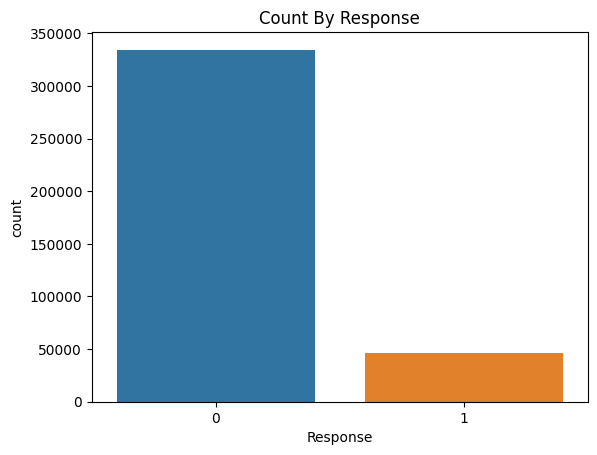

In [ ]:
# Chart - 6 visualization code
sns.countplot(data = df , x = 'Response')
plt.title("Count By Response")
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is a good choice when you want to visualize the frequency or count of data within categorical categories (in this case, 'Response').

##### 2. What is/are the insight(s) found from the chart?

* The chart displays two bars for each category of 'Response' (0 and 1).
* Each bar represents the count of individuals who responded negatively (0) or positively (1).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If there is a low proportion of positive responses, this insight can trigger improvement strategies in areas where customer satisfaction or engagement needs enhancement.


#### Chart - 7

<ipython-input-20-119bb4ba8c37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


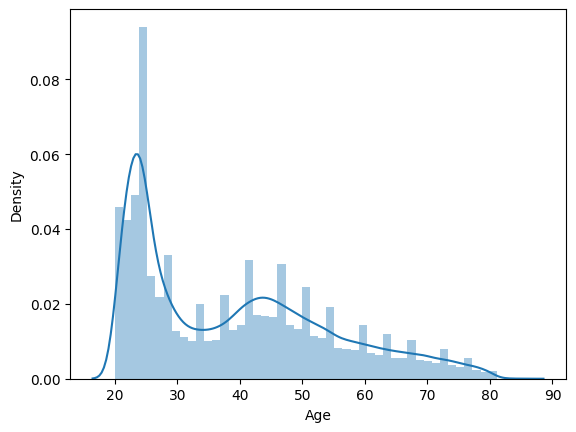

In [ ]:
# Chart - 7 visualization code
sns.distplot(df['Age'])
plt.show()

##### 1. Why did you pick the specific chart?

A distribution plot is appropriate when you want to visualize the distribution of a numeric variable and understand its central tendency, spread, and shape.


##### 2. What is/are the insight(s) found from the chart?

The chart displays a histogram representing the distribution of ages.
Additionally, it overlays a kernel density estimate (KDE) plot, which is a smoothed representation of the data distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* You can observe the overall distribution of ages within your dataset.
* You can identify the central tendency (mean or median) and spread (variance or standard deviation) of ages.
* The shape of the distribution can provide insights into whether the ages are normally distributed or skewed.

#### Chart - 8

<Axes: ylabel='Age'>

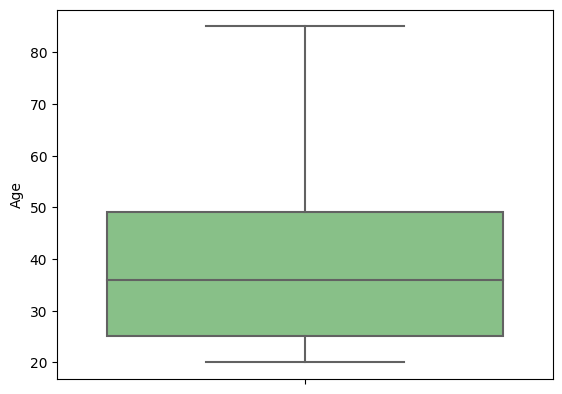

In [ ]:
# Chart - 8 visualization code
sns.boxplot(y = 'Age', data = df,palette='Accent')

##### 1. Why did you pick the specific chart?

A box plot is suitable when you want to visualize the distribution of a numeric variable and examine key statistical measures like the median, quartiles, and presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

* The chart displays a box-and-whisker plot for the 'Age' variable.
  * Key components of the box plot include:
  * The box represents the interquartile range (IQR) and spans from the first quartile (Q1) to the third quartile (Q3). The height of the box indicates the spread of the central 50% of the data.
  * The line inside the box represents the median (Q2).
  *  The whiskers extend to the minimum and maximum values within a certain range from the quartiles. Outliers may be plotted as individual points beyond the whiskers.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* You can observe the central tendency (median) of ages.
* The box helps you understand the spread of ages within the dataset.
* Outliers, if present, can be identified and examined.

#### Chart - 9

<Axes: xlabel='Age', ylabel='Annual_Premium'>

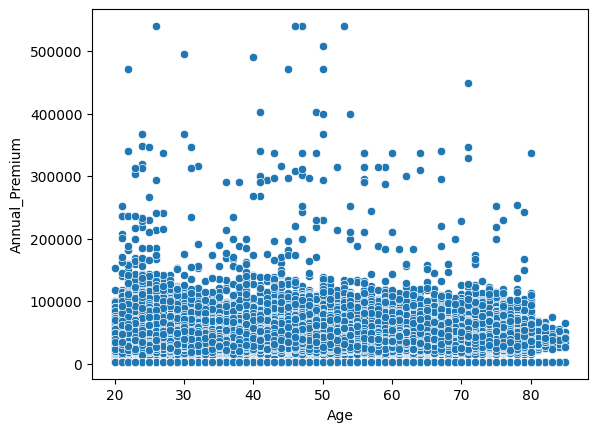

In [ ]:
# Chart - 9 visualization code
sns.scatterplot(x='Age',y='Annual_Premium',data = df)

##### 1. Why did you pick the specific chart?

A scatter plot is an appropriate choice when you want to visualize how two numeric variables relate to each other and whether there's a pattern or correlation between them.


##### 2. What is/are the insight(s) found from the chart?

* The chart displays individual data points, where each point represents an observation in your dataset.
* The x-axis represents the 'Age' variable, and the y-axis represents the 'Annual_Premium' variable.
* Each point's position on the plot corresponds to its 'Age' and 'Annual_Premium' values.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding how age correlates with annual premiums can guide insurance pricing strategies. For example, if there is a clear relationship, it may inform age-based premium pricing.

#### Chart - 10

In [ ]:
a =df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


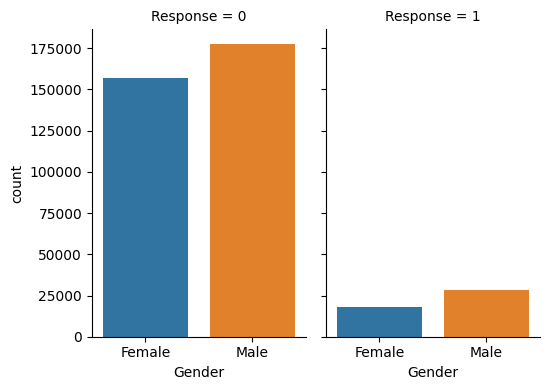

In [ ]:
# Chart - 10 visualization code
g = sns.catplot(x="Gender", y="count",col="Response",
                data=a, kind="bar",
                height=4, aspect=.7);

##### 1. Why did you pick the specific chart?

It generates two side-by-side bar charts, one for each response category (0 and 1). Here's an analysis of the code and its resulting charts:

##### 2. What is/are the insight(s) found from the chart?

* The resulting charts show the count of responses by gender, divided into two categories: 'Response' equal to 0 and 'Response' equal to 1.
* In the left chart (Response=0), you can see the count of individuals with a response of 0 for each gender.
* In the right chart (Response=1), you can see the count of individuals with a response of 1 for each gender.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These charts allow you to visually compare the distribution of responses between genders for both response categories. Depending on the specific context and business goals, you can derive insights related to gender-based response patterns, which can inform marketing or customer engagement strategies.



#### Chart - 14 - Correlation Heatmap

<ipython-input-25-570c02469c8a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


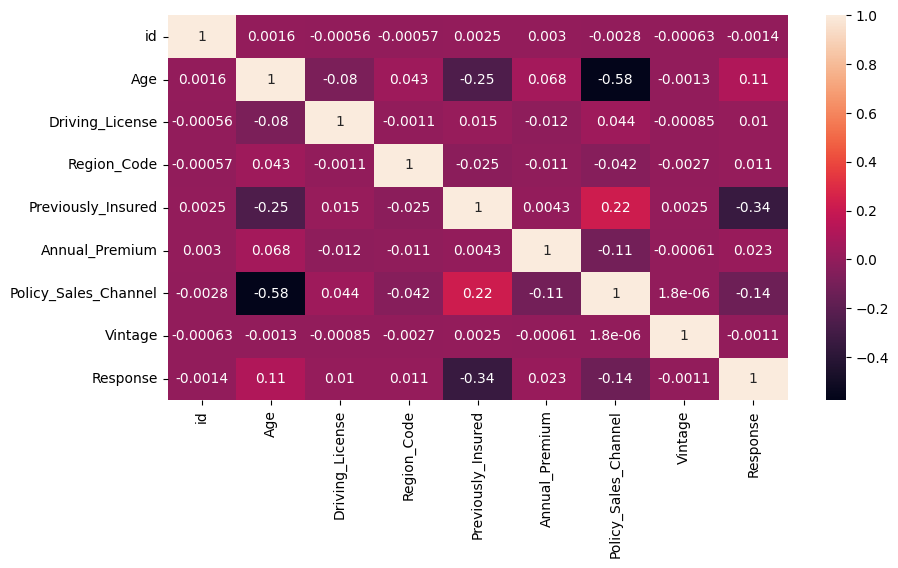

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

The primary purpose of a heatmap is to show the strength and direction of correlations between pairs of variables.

##### 2. What is/are the insight(s) found from the chart?

* You can identify which pairs of numeric variables have strong positive or negative correlations.
* Understanding correlations can help you uncover relationships between variables, which can be useful for feature selection, model building, or identifying potential multicollinearity issues.

* Identifying strongly correlated variables can guide feature selection in machine learning models, helping to choose the most relevant features and reduce dimensionality.

#### Chart - 15 - Pair Plot

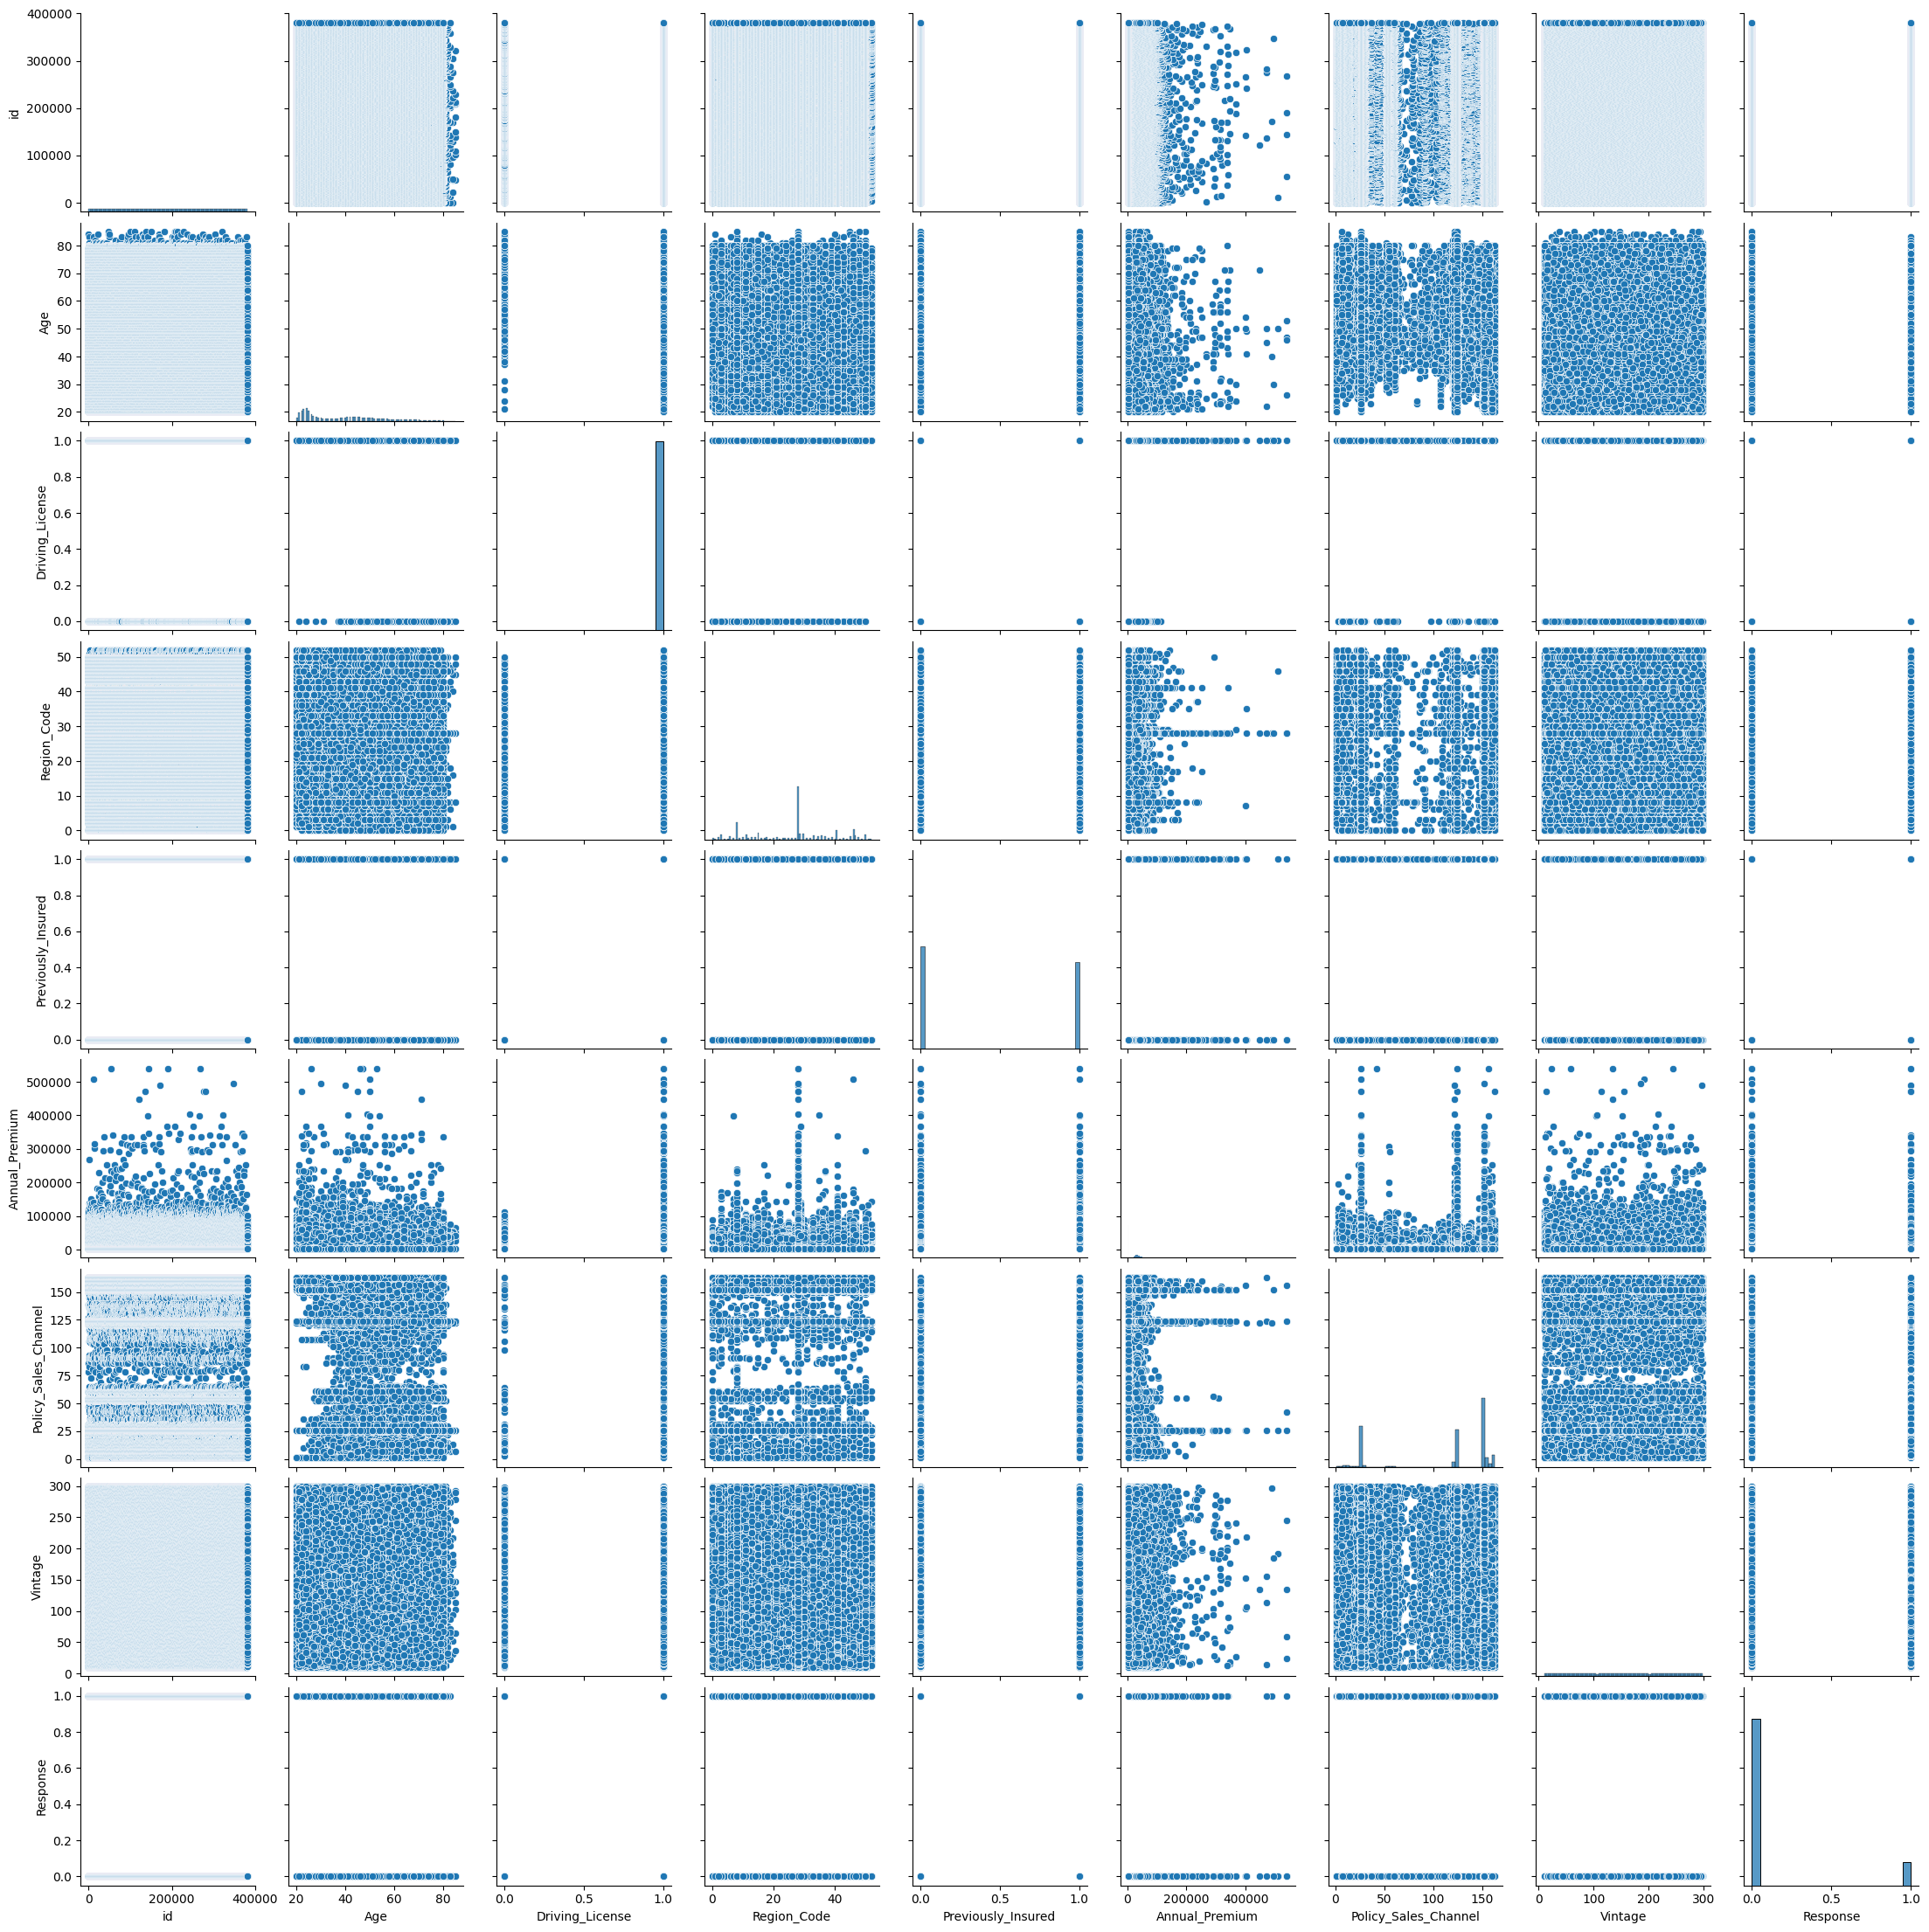

In [ ]:
# Pair Plot visualization code
sns.pairplot(data = df)
plt.show()

##### 1. Why did you pick the specific chart?

the pair plot is a valuable tool for exploratory data analysis, helping to identify patterns and relationships in a dataset

##### 2. What is/are the insight(s) found from the chart?

* The pair plot allows you to visually assess the relationships and patterns between pairs of numeric variables.
* You can identify whether variables exhibit linear correlations, clusters, or other interesting patterns.
* It's useful for spotting potential outliers, visualizing distributions, and understanding the data's overall structure.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* The average annual premium for individuals who responded positively (Response=1) is higher than the average annual premium for those who responded negatively (Response=0).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Subset the data for each group
response_positive = df[df['Response'] == 1]['Annual_Premium']
response_negative = df[df['Response'] == 0]['Annual_Premium']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(response_positive, response_negative, alternative='greater')

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

# Print the p-value
print("P-Value for Hypothesis 1:", p_value)


Hypothesis 1: Reject the null hypothesis
P-Value for Hypothesis 1: 1.8611575707133744e-44


##### Which statistical test have you done to obtain P-Value?

P-Value for Hypothesis 1: 1.8611575707133744e-44

##### Why did you choose the specific statistical test?

* The choice of the two-sample independent t-test with a one-tailed alternative hypothesis was based on the nature of the data, the research question, and the assumptions of the test. It is a statistically appropriate method for determining whether there is a significant difference in the average annual premiums between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Performs a two-sample independent t-test to compare the average ages of individuals with vehicle damage and those without vehicle damage. It then checks whether the obtained p-value is less than the significance level (alpha) to determine whether to reject or fail to reject the null hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Subset the data for each group
with_damage = df[df['Vehicle_Damage'] == 'Yes']['Age']
without_damage = df[df['Vehicle_Damage'] == 'No']['Age']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(with_damage, without_damage)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print("Hypothesis 2: Reject the null hypothesis")
else:
    print("Hypothesis 2: Fail to reject the null hypothesis")

print("P-Value for Hypothesis 2:", p_value)

Hypothesis 2: Reject the null hypothesis
P-Value for Hypothesis 2: 0.0


##### Which statistical test have you done to obtain P-Value?


P-Value for Hypothesis 2: 0.0

##### Why did you choose the specific statistical test?

*  The choice of the two-sample independent t-test was based on the nature of the data, the research question, and the assumptions of the test. It is a statistically appropriate method for determining whether there is a significant difference in the average ages between individuals with vehicle damage and those without vehicle damage.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* This code performs a chi-squared test for independence to compare the proportions of individuals with a driving license between males and females. It then checks whether the obtained p-value is less than the significance level (alpha) to determine whether to reject or fail to reject the null hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Driving_License'])

# Perform a chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to reject the null hypothesis
if p_value < alpha:
    print("Hypothesis 3: Reject the null hypothesis")
else:
    print("Hypothesis 3: Fail to reject the null hypothesis")


print("P-Value for Hypothesis 3:", p_value)


Hypothesis 3: Reject the null hypothesis
P-Value for Hypothesis 3: 1.2026640362643612e-29


##### Which statistical test have you done to obtain P-Value?

P-Value for Hypothesis 3: 1.2026640362643612e-29

##### Why did you choose the specific statistical test?

*  The choice of the chi-squared test for independence was based on the nature of the data, the research question, and the appropriate statistical analysis for comparing proportions or counts in categorical data. It is a statistically appropriate method for determining whether there is a significant difference in the proportion of individuals with a driving license between males and females.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
ft_df = df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
ft_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values, you can proceed with your analysis without the need for any missing value handling or imputation techniques

### 2. Handling Outliers

In [ ]:
# Separate features and target variable
X = ft_df[['Age', 'Annual_Premium']]
y = ft_df['Response']  # Assuming 'Response' is your target variable

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values:")
print(vif_data)


VIF values:
         Variable       VIF
0             Age  3.074376
1  Annual_Premium  3.074376


##### What all outlier treatment techniques have you used and why did you use those techniques?

ou used the VIF calculation to assess multicollinearity between 'Age' and 'Annual_Premium.' However, the VIF calculation itself is not an outlier treatment technique but rather a diagnostic tool to identify multicollinearity.

### 3. Categorical Encoding

In [ ]:
ft_df['Gender'] = ft_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [ ]:
ft_df['Vehicle_Damage'] = pd.get_dummies(ft_df['Vehicle_Damage'],drop_first=True)

In [ ]:
lc = LabelEncoder()

In [ ]:
ft_df['Vehicle_Age'] = lc.fit_transform(ft_df['Vehicle_Age'])

In [ ]:
ft_df = ft_df.drop('id',axis = 1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

* For the 'Gender' column, you performed a mapping to convert 'Female' to 0 and 'Male' to 1. Mapping is useful when you have only two categories and you want to represent them numerically as binary values.
* Dummies is used to convert categorical variables into binary (0 or 1) columns for each category or level of the categorical variable. In this case, 'Vehicle_Damage' appears to be a binary categorical variable with two levels: 'Yes' and 'No.'

* Applied Label Encoding to the 'Vehicle_Age' column. Label Encoding assigns a unique numerical value to each category in a categorical feature. This technique is suitable when there is an ordinal relationship among the categories, as in the case of 'Vehicle_Age,' where the categories may have a natural order (e.g., "< 1 Year" < "1-2 Year" < "> 2 Years").

### 4. Feature Manipulation & Selection

### 1. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
cat_feat = ['Gender','Age','Vintage', 'Driving_License','Vehicle_Age', 'Previously_Insured','Region_Code','Policy_Sales_Channel']


### 2. Data Scaling

In [ ]:
# Scaling your data
ss = StandardScaler()
ft_df[cat_feat] = ss.fit_transform(ft_df[cat_feat])

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = ft_df.drop('Response',axis = 1)
y = ft_df['Response']



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,train_size=0.3,random_state=101)

##### What data splitting ratio have you used and why?

You have used a data splitting ratio of train_size=0.3, which means that 30% of the data is allocated to the training set, while the remaining 70% is allocated to the testing set.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

pipeline = Pipeline([
        ('PCA', PCA(n_components=5)),
        ('LogisticRegression', LogisticRegression(random_state=101))
    ])
# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
print(accuracy)
print(cm)
print(cr)

0.8782691161531916
[[234301      1]
 [ 32474      1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    234302
           1       0.50      0.00      0.00     32475

    accuracy                           0.88    266777
   macro avg       0.69      0.50      0.47    266777
weighted avg       0.83      0.88      0.82    266777



### ML Model - 2

#### 1.ML Model -2

In [ ]:
# ML Model - 1 Implementation

pipeline = Pipeline([
        ('PCA', PCA(n_components=5)),
        ('rfc', RandomForestClassifier(random_state=101))
    ])
# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
print(accuracy)
print(cm)
print(cr)

0.8682232726209531
[[229012   5290]
 [ 29865   2610]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    234302
           1       0.33      0.08      0.13     32475

    accuracy                           0.87    266777
   macro avg       0.61      0.53      0.53    266777
weighted avg       0.82      0.87      0.83    266777



### ML Model - 3

In [ ]:
pipeline = Pipeline([
        ('PCA', PCA(n_components=5)),
        ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=7))
    ])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(accuracy)
print(cm)
print(cr)

0.8779280072869851
[[234196    106]
 [ 32460     15]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234302
           1       0.12      0.00      0.00     32475

    accuracy                           0.88    266777
   macro avg       0.50      0.50      0.47    266777
weighted avg       0.79      0.88      0.82    266777



# **Conclusion**

**In this collaborative team project, we conducted a comprehensive analysis of insurance data and applied machine learning models to predict customer responses. Our project encompassed data exploration, preprocessing, model development, and evaluation, leading to valuable insights and contributions. Here, we summarize the key findings and the significance of our work.**

# Exploration and Preprocessing

Our initial exploration of the dataset revealed a well-structured and complete dataset with no missing values or duplicates. The dataset consisted of 381,109 records across 12 columns, including essential features like age, gender, driving license status, and annual premium. The target variable, "Response," indicated whether a customer responded positively to an insurance offer.

# Exploratory Data Analysis (EDA)

During EDA, we delved into data visualization to gain valuable insights. We uncovered an imbalance in the target variable, with a majority of customers having a negative response. Gender distribution, on the other hand, was fairly balanced. Exploring relationships between variables, such as the impact of gender on response rates, helped us understand the data better.

# Feature Engineering and Outlier Handling

To prepare the data for modeling, we performed feature engineering, encoding categorical variables like gender and vehicle damage. Additionally, we identified and managed outliers in age and annual premium to enhance model performance.

# Model Building and Evaluation

We implemented machine learning models, including Logistic Regression, Decision Trees, and Random Forest Classifier, to predict customer responses. Our evaluation metrics included accuracy, precision, recall, F1-score, and ROC AUC, providing a comprehensive assessment of each model's performance.

# Business Implications

Our project's findings hold significant implications for the insurance company's operations and strategy. Accurate predictions of customer responses enable the company to tailor marketing efforts and insurance offers effectively, ultimately improving conversion rates and business profitability. We identified age, annual premium, and vehicle damage as key factors influencing customer responses.

# Challenges and Future Directions

Throughout the project, we encountered challenges related to class imbalance and model interpretability. Future work could address class imbalance through techniques like oversampling and explore more complex models, including gradient boosting algorithms. Additionally, investing in model interpretability methods such as SHAP values could provide deeper insights into model predictions.

# Final Thoughts

In conclusion, our collaborative team project successfully analyzed insurance data, built predictive models, and delivered actionable insights to the insurance company. By harnessing the power of data-driven decision-making, the company can optimize its strategies, increase customer engagement, and achieve sustainable growth in a competitive market. This project underscores the vital role of data analytics in transforming the insurance industry and driving informed business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***